In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\renan.teixeira\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
df = pd.read_parquet("df_final")

In [7]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomePerDependent,DebtPerLoan,Pagamentos_atrasados_Total
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2,3040.0,0.057356,2
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1,1300.0,0.024375,0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,3042.0,0.028371,2
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,3300.0,0.006008,0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0,63588.0,0.003116,1


In [9]:
# Suponha que a coluna alvo seja 'default' (ajuste conforme seu caso)
X = df.drop('SeriousDlqin2yrs' , axis = 1)
y = df['SeriousDlqin2yrs']

# Divisão treino / teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [10]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomePerDependent,DebtPerLoan,Pagamentos_atrasados_Total
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2,3040.0,0.057356,2
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1,1300.0,0.024375,0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,3042.0,0.028371,2
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,3300.0,0.006008,0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0,63588.0,0.003116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0,2100.0,0.045026,0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2,1861.333333,0.143312,0
149998,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0,5400.0,203.684211,0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0,5716.0,0.000000,0


In [12]:
y

1         1
2         0
3         0
4         0
5         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [13]:
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])


In [14]:
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])


In [15]:
pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LogisticRegression(max_iter=1000))
])


In [16]:
modelos = {
    'Logística Simples': pipe_logreg,
    'Naive Bayes': pipe_nb,
    'Logística Polinomial': pipe_poly
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    resultados.append({
        'Modelo': nome,
        'Acurácia': acc,
        'AUC': auc
    })

# Resultado final em tabela
resultados_df = pd.DataFrame(resultados)
display(resultados_df)


c:\Users\renan.teixeira\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Modelo,Acurácia,AUC
0,Logística Simples,0.933778,0.707684
1,Naive Bayes,0.932689,0.696834
2,Logística Polinomial,0.936578,0.821131


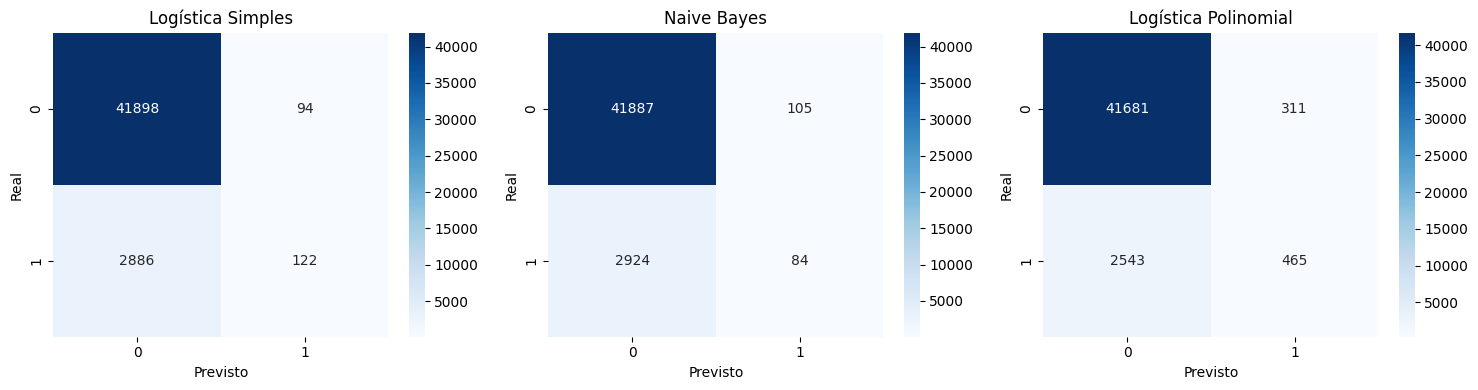

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (nome, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(nome)
    ax.set_xlabel('Previsto')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()
